In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ayarlar
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Veriyi oku
df = pd.read_csv("cleaned_data.csv")
print(f"Satır sayısı: {len(df)}")
df.head()


Matplotlib is building the font cache; this may take a moment.


Satır sayısı: 2957


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,HomeElo,AwayElo,ProbH,ProbD,ProbA,BookmakerMargin,EloDiff,ResultLabel
0,2001-01-01,Birmingham,Nottm Forest,0.0,2.0,A,1.75,3.25,3.90,1552.46,1504.57,0.571429,0.307692,0.256410,0.135531,47.89,-1
1,2001-01-01,Burnley,Wolves,1.0,2.0,A,1.80,3.15,3.90,1446.85,1487.49,0.555556,0.317460,0.256410,0.129426,-40.64,-1
2,2001-01-01,Norwich,Blackburn,1.0,1.0,D,2.80,2.90,2.35,1439.77,1567.17,0.357143,0.344828,0.425532,0.127502,-127.40,0
3,2001-01-01,Portsmouth,Gillingham,0.0,0.0,D,1.95,3.20,3.25,1445.81,1441.16,0.512821,0.312500,0.307692,0.133013,4.65,0
4,2001-01-01,Preston,Bolton,0.0,2.0,A,2.45,3.00,2.55,1461.54,1594.84,0.408163,0.333333,0.392157,0.133653,-133.30,-1


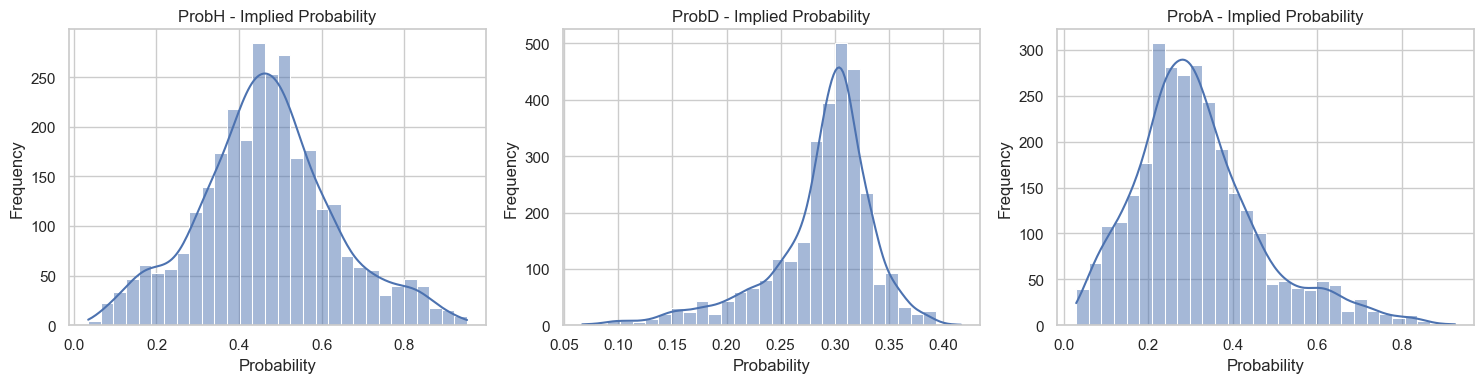

In [2]:
# Ev sahibi, beraberlik, deplasman için implied probability histogramları
plt.figure(figsize=(15, 4))

for i, col in enumerate(['ProbH', 'ProbD', 'ProbA']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} - Implied Probability")
    plt.xlabel("Probability")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [3]:
# Her maç için en yüksek olasılığı alalım
df['PredictedResult'] = df[['ProbH', 'ProbD', 'ProbA']].idxmax(axis=1).str[-1]  # 'H', 'D', 'A'

# Gerçek ve tahmin karşılaştırması
confusion = pd.crosstab(df['PredictedResult'], df['FTR'], rownames=['Predicted'], colnames=['Actual'])

print("Tahmin vs Gerçek Sonuç Matrisi:")
display(confusion)

# Doğru tahmin oranı
accuracy = (df['PredictedResult'] == df['FTR']).mean()
print(f"\nBahis oranı favorisi doğru tahmin oranı: %{accuracy * 100:.2f}")


Tahmin vs Gerçek Sonuç Matrisi:


Actual,A,D,H
Predicted,,,
A,383,212,175
D,1,0,1
H,482,608,1095



Bahis oranı favorisi doğru tahmin oranı: %49.98


Sonuç Dağılımı (Gerçek Maç Sonuçları):


FTR
H    0.429828
A    0.292864
D    0.277308
Name: proportion, dtype: float64

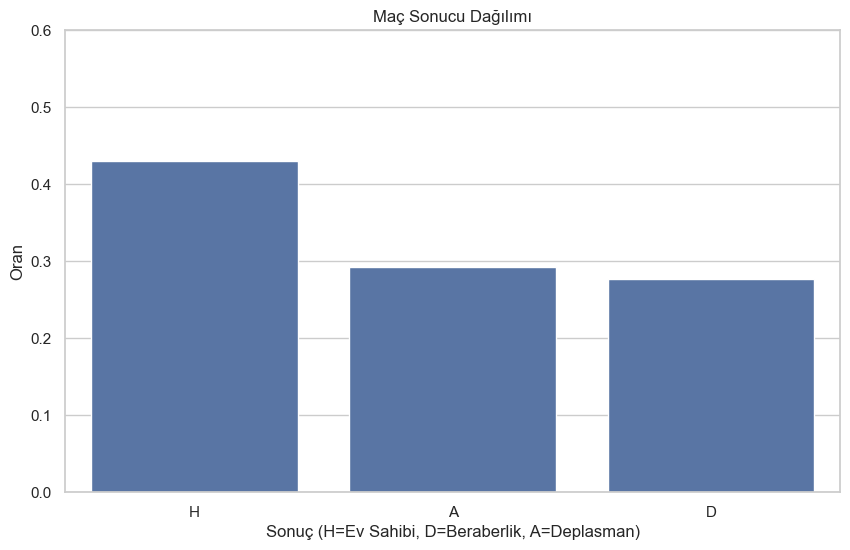

In [4]:
# FTR sütunundaki dağılım
result_counts = df['FTR'].value_counts(normalize=True)

print("Sonuç Dağılımı (Gerçek Maç Sonuçları):")
display(result_counts)

# Çubuk grafikle gösterelim
sns.barplot(x=result_counts.index, y=result_counts.values)
plt.title("Maç Sonucu Dağılımı")
plt.xlabel("Sonuç (H=Ev Sahibi, D=Beraberlik, A=Deplasman)")
plt.ylabel("Oran")
plt.ylim(0, 0.6)
plt.show()


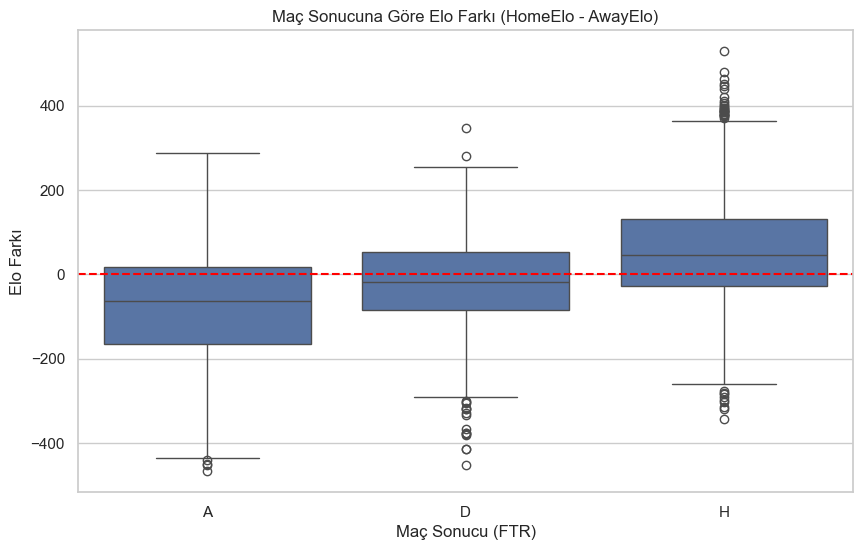

In [5]:
sns.boxplot(x='FTR', y='EloDiff', data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title("Maç Sonucuna Göre Elo Farkı (HomeElo - AwayElo)")
plt.xlabel("Maç Sonucu (FTR)")
plt.ylabel("Elo Farkı")
plt.show()


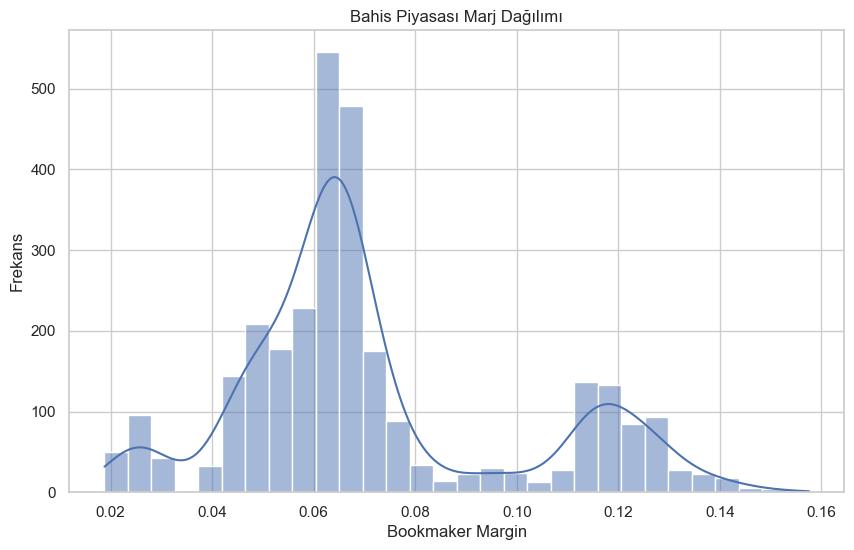

In [6]:
sns.histplot(df['BookmakerMargin'], bins=30, kde=True)
plt.title("Bahis Piyasası Marj Dağılımı")
plt.xlabel("Bookmaker Margin")
plt.ylabel("Frekans")
plt.show()


In [8]:
!pip install scipy


     |████████████████████████████████| 30.3 MB 74.5 MB/s eta 0:00:01
You should consider upgrading via the '/Users/ardayigit/Desktop/dsa210/venv/bin/python3 -m pip install --upgrade pip' command.


In [10]:
from scipy.stats import binomtest

# Tahmin ve gerçek sonucu karşılaştır
df['PredictedResult'] = df[['ProbH', 'ProbD', 'ProbA']].idxmax(axis=1).str[-1]
correct_preds = (df['PredictedResult'] == df['FTR']).sum()
total_preds = len(df)

# H0: başarı oranı = 1/3 (şans eseri)
result = binomtest(correct_preds, total_preds, p=1/3, alternative='greater')

print(f"Toplam maç sayısı: {total_preds}")
print(f"Doğru tahmin sayısı: {correct_preds}")
print(f"Başarı oranı: %{(correct_preds / total_preds) * 100:.2f}")
print(f"p-değeri: {result.pvalue:.5f}")

# Karar
if result.pvalue < 0.05:
    print("→ Sonuç: Bahis favorisi anlamlı şekilde daha sık kazanıyor. (H0 REDDEDİLDİ)")
else:
    print("→ Sonuç: Bahis favorisi şansa eşdeğer tahmin ediyor. (H0 REDDEDİLEMEDİ)")


Toplam maç sayısı: 2957
Doğru tahmin sayısı: 1478
Başarı oranı: %49.98
p-değeri: 0.00000
→ Sonuç: Bahis favorisi anlamlı şekilde daha sık kazanıyor. (H0 REDDEDİLDİ)
